In [3]:
# Linear Regression

# Y = wX + b
# Y - Dependent variable
# X - Independent Variable
# w - weight
# b - bias

# Gradient Descent:
# Gradient Descent ia an optimization algorithm used for minimizing the loss function in various machine learning algorithm.
# It is used for updating the parameters of the learning model.

# w = w-a*dw
# b = b-a*db

# Learning Rate:
# Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function

In [135]:
import numpy as np    #importing numpy library
import pandas as pd

#Linear Regression
class Linear_Regression():
    def __init__(self,learning_rate, no_of_iterations):            #initialization function
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self, X, Y):                 #fit function to train the data , x-experience, y - salary
        #no.of training examples and number of features
        self.m , self.n  = X.shape     #no.of rows and no.of columns

        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.no_of_iterations):
          self.update_weight()

    
    def update_weight( self ):        #function to update the weight
        Y_prediction = self.predict(self.X)

        #Calculating the gradients
        
        dw = - ( 2 * (self.X.T ).dot( self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        #updating the weights

        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
            

    def predict(self, X):              #used for predicting by giving a parameter

        return X.dot(self.w) + self.b        #y = mx+c


In [136]:
#Using Linear Regression Model for prediction

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [138]:
#Data pre processing

In [139]:
#loading csv file
dataset = pd.read_csv("salary_data.csv")
dataset.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [140]:
#checking for missing values
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [141]:
dataset.shape

(30, 2)

In [142]:
#splitting the feature and target
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values



In [143]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [144]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [145]:
#Splliting the training and test

In [146]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 2)

In [163]:
#Training the model for Linear Regression

model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 100)
model.fit(X_train, Y_train)

In [164]:
#printing the parameter values (weights & bias)

print('weight = ', model.w[0])
print('bias = ',model.b)

weight =  10941.258155090314
bias =  13499.045037502532


In [165]:
# y = 9514(x).23697
#salary = 9514(experience).23697

In [166]:
#Predict the salary value for test data

test_data_prediction = model.predict(X_test)

In [167]:
print(test_data_prediction)

[ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


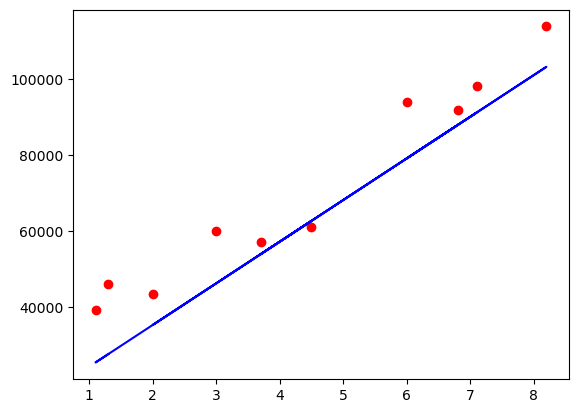

In [170]:
#To Visualizing the predicted values & actual values

plt.scatter(X_test,Y_test,color = 'r')
plt.plot(X_test, test_data_prediction, color = 'b')

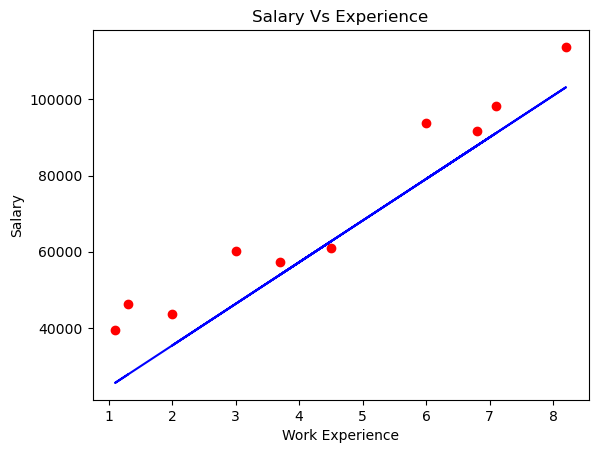

In [171]:
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary Vs Experience")
plt.scatter(X_test,Y_test,color = 'r')
plt.plot(X_test, test_data_prediction, color = 'b')